In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [6]:
#Reflect Tables into SQLAlchemy ORM
#Python SQL tookkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
#create engine to hawaii.sqlite
engine = create_engine("sqlite:///starter_code/Resources/hawaii.sqlite")

In [11]:
#reflect an existing database into a new model
Base = automap_base()

#reflect the tables
Base.prepare(autoload_with=engine)

In [12]:
#view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
#save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [25]:
#Exploratory Precipitation Analysis
#Find the most recent date in the data set. 
inspector = inspect(engine)
measurement_columns = inspector.get_columns('measurement')
for c in measurement_columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [26]:
station_columns = inspector.get_columns('station')
for c in station_columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [27]:
session = Session(engine)
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01',)

In [24]:
#design a query to retrieve the last 12 months of precipitation data and plot the results
#calculate the date one year from the last date in the data set
session.query(measurement.date).\
    order_by(measurement.date.desc()).first()

('2017-08-23',)

In [39]:
#perform a query to retrieve the data and precipitation scores
values = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23').\
    order_by(measurement.date).all()
print(values)

[('2016-08-23', 0.0), ('2016-08-23', 0.15), ('2016-08-23', 0.05), ('2016-08-23', None), ('2016-08-23', 0.02), ('2016-08-23', 1.79), ('2016-08-23', 0.7), ('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9),

In [40]:
#save the query results as a pandas dataframe and set the index to the date column
df = pd.DataFrame(values, columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


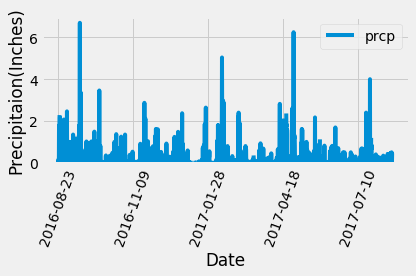

In [45]:
df.plot()
plt.ylim(0,7)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Precipitaion(Inches)')
plt.tight_layout()
plt.show()

In [46]:
#use pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [47]:
#Exploratory Station Analysis
#Design a query to calculate the total number of stations in the dataset
station_count = session.query(station).distinct().count()
print(station_count)

9


In [53]:
#design a query to find the most active stations(ie. what stations have the most rows?)
#list the stations and counts in descending order
active_station = session.query(measurement.station, func.count(measurement.station)).\
    order_by(func.count(measurement.station).desc()).\
    group_by(measurement.station).all()
print(active_station)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [59]:
#using the most active station id from the previous query, calculate the lowest, highest and average temperature
#select the most active station from above list
most_active = session.query(measurement.station, func.count(measurement.station)).\
    order_by(func.count(measurement.station).desc()).\
    group_by(measurement.station).first()
print(most_active)

('USC00519281', 2772)


In [60]:
#separating the station id from the number of rows
most_active_station = most_active[0]
most_active_station

'USC00519281'

In [61]:
#lowest temperature for most active station
lowest_temp = session.query(func.min(measurement.tobs)).\
    filter(measurement.station==most_active_station).all()
print(lowest_temp)

[(54.0,)]


In [62]:
#highest temperature for most active station
highest_temp = session.query(func.max(measurement.tobs)).\
    filter(measurement.station==most_active_station).all()
print(highest_temp)

[(85.0,)]


In [64]:
#average temperature for most active station
avg_temp = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station==most_active_station).all()
print(avg_temp)

[(71.66378066378067,)]


In [67]:
#using the most active station id query the last 12 months of temperature observation data and plot as a histogram
#find dates for the last 12 months of this station's temperature data
station_date_1 = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == most_active_station).\
    order_by(measurement.date.desc()).first()
print(station_date_1)

('2017-08-18', 79.0)


In [81]:
#dates 12 months from station date 1
station_date_2 = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == most_active_station).\
    filter(measurement.date >= '2016-08-18').\
    order_by(measurement.date).all()
for value in station_date_2:
    print(value)

('2016-08-18', 80.0)
('2016-08-19', 79.0)
('2016-08-20', 81.0)
('2016-08-21', 79.0)
('2016-08-22', 78.0)
('2016-08-23', 77.0)
('2016-08-24', 77.0)
('2016-08-25', 80.0)
('2016-08-26', 80.0)
('2016-08-27', 75.0)
('2016-08-28', 73.0)
('2016-08-29', 78.0)
('2016-08-30', 77.0)
('2016-08-31', 78.0)
('2016-09-01', 80.0)
('2016-09-02', 80.0)
('2016-09-03', 78.0)
('2016-09-04', 78.0)
('2016-09-05', 78.0)
('2016-09-06', 73.0)
('2016-09-07', 74.0)
('2016-09-08', 80.0)
('2016-09-09', 79.0)
('2016-09-10', 77.0)
('2016-09-11', 80.0)
('2016-09-12', 76.0)
('2016-09-13', 79.0)
('2016-09-14', 75.0)
('2016-09-15', 79.0)
('2016-09-16', 78.0)
('2016-09-17', 79.0)
('2016-09-18', 78.0)
('2016-09-19', 78.0)
('2016-09-20', 76.0)
('2016-09-21', 74.0)
('2016-09-22', 77.0)
('2016-09-23', 78.0)
('2016-09-24', 79.0)
('2016-09-25', 79.0)
('2016-09-26', 77.0)
('2016-09-27', 80.0)
('2016-09-28', 78.0)
('2016-09-29', 78.0)
('2016-09-30', 78.0)
('2016-10-01', 77.0)
('2016-10-02', 79.0)
('2016-10-03', 79.0)
('2016-10-04'

In [83]:
#show results in a dataframe
histo_df = pd.DataFrame(station_date_2)
histo_df.head()

,0,1
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0


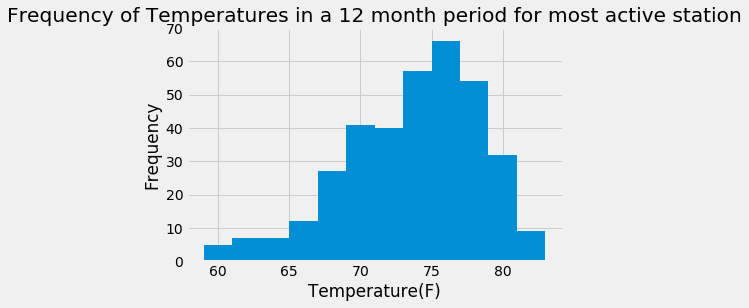

In [85]:
#plot the data to a histo
histo_plot = histo_df.hist(bins=12)
plt.xlabel('Temperature(F)')
plt.ylabel('Frequency')
plt.title('Frequency of Temperatures in a 12 month period for most active station')
plt.ylim(0,70)
plt.show()

In [86]:
session.close()